<a id="top9"></a>
# Model performance comparison

Finally, we can compare the performance of the models.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

data = {'Model':['Baseline','Random Forest','SVM','Dense Network','Dense Network 2 layers','ConvNet MFCCs'],
        'Test Accuracy %':[26.00,91.2,96.1,82.47,92.26,88.49]}

df = pd.DataFrame(data=data)

df.sort_values(by='Test Accuracy %', ascending=False, ignore_index=True)

,Model,Test Accuracy %
0,SVM,96.10
1,Dense Network 2 layers,92.26
2,Random Forest,91.20
3,ConvNet MFCCs,88.49
4,Dense Network,82.47
5,Baseline,26.00


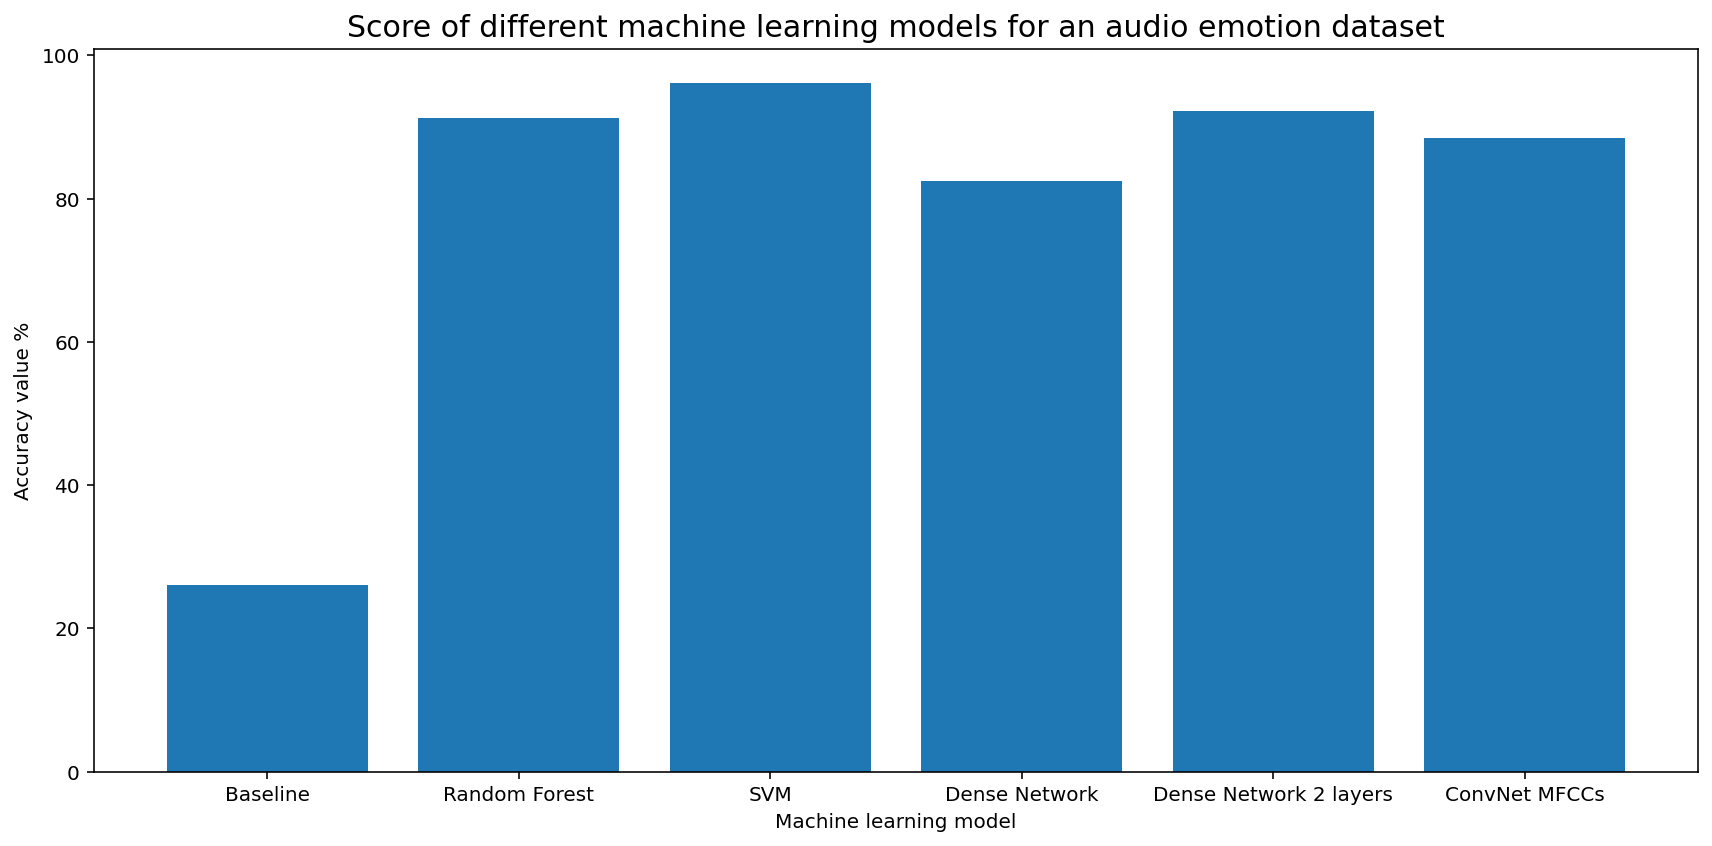

In [2]:
plt.figure(figsize=(12, 6))
plt.bar(df['Model'], df['Test Accuracy %'], width=0.8)
plt.title('Score of different machine learning models for an audio emotion dataset', size=15)
plt.xlabel('Machine learning model')
plt.ylabel('Accuracy value %')
plt.tight_layout()
plt.show()

All models succeeded in beating the baseline, with Support Vector Machine being the best overall.

Let's also compare the results of the models by each emotion:

In [3]:
categories = ['angry','disgust','fear','happy','neutral','sad','surprise']

rf_scores = [96,92,88,86,96,75,89]
svm_scores = [98,98,94,96,98,90,92]
nn1_scores = [80,87,83,76,83,81,88]
nn2_scores = [94,93,86,89,94,92,89]
cnn_scores = [91,89,94,85,89,80,89]

scores = pd.DataFrame([rf_scores, svm_scores, nn1_scores, nn2_scores, cnn_scores],
                      columns = categories,
                      index=['Random Forest','SVM','Dense Network','Dense Network layers','ConvNet MFCCs'])
scores

,angry,disgust,fear,happy,neutral,sad,surprise
Random Forest,96,92,88,86,96,75,89
SVM,98,98,94,96,98,90,92
Dense Network,80,87,83,76,83,81,88
Dense Network layers,94,93,86,89,94,92,89
ConvNet MFCCs,91,89,94,85,89,80,89


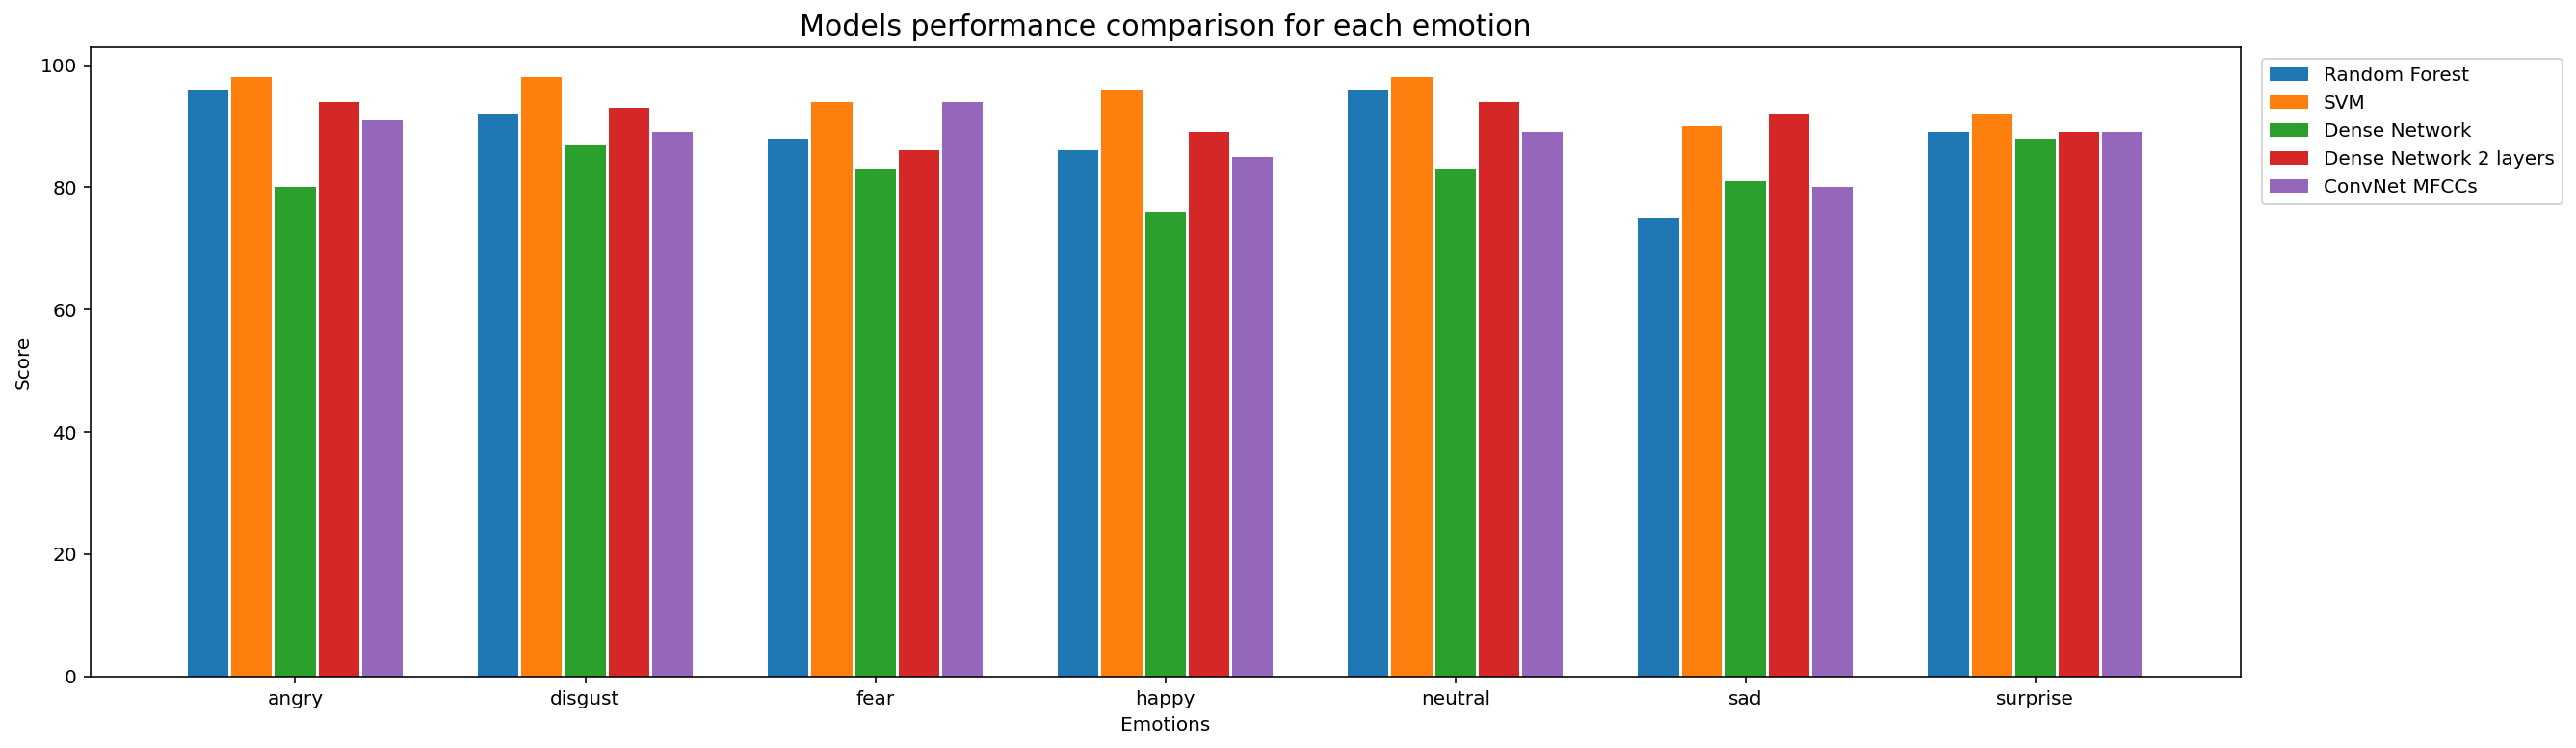

In [4]:
X_axis = np.arange(len(categories))

plt.figure(figsize=(20, 6))

plt.bar(X_axis - 0.3, rf_scores, 0.14, label = 'Random Forest')
plt.bar(X_axis - 0.15, svm_scores, 0.14, label = 'SVM')
plt.bar(X_axis + 0., nn1_scores, 0.14, label = 'Dense Network')
plt.bar(X_axis + 0.15, nn2_scores, 0.14, label = 'Dense Network 2 layers')
plt.bar(X_axis + 0.3, cnn_scores, 0.14, label = 'ConvNet MFCCs')

plt.xticks(X_axis, categories)
plt.xlabel("Emotions")
plt.ylabel("Score")
plt.title("Models performance comparison for each emotion", size=15)
plt.legend(loc=(1.01, 0.75))
plt.show()

These data show that the emotions `angry`, `disgust`, and `neutral` were the best to categorize. Also, it appears that the `sad` category was the most difficult to be predicted.

The Support Vector Machine model also beated all the others model in each occasion.

### Final considerations on the project

* **Data quality is very important**: <br/>As seen with the Crema-D dataset, choosing inadequate data can add a lot of 'noise' to classification problems, thus leading to bad results. In this case, the visualization of dimensionality reduction techniques such as PCA and especially T-SNE was determinant in deciding not to implement this source in the modeling part.

* **Data quantity**: <br/>Eventually, about 8000 samples were used to train the models, and around 1000 served for the final evaluation as unseen data as test set. Although the results seem encouraging, more samples are needed to improve the ability of machine learning algorithms to generalize emotion perception and hence obtain more robust models.

* **Feature extraction time**: <br/>Some features have required a long time for their extraction, particularly the data for the fundamental frequencies took several hours to be obtained. Of course, this observation concerns the 'librosa' package, as there are other algorithms and libraries that have not been tested.

* **MFCC data confirmed to be effective in sound analysis**: <br/>The data from this particular spectrogram, which is now widely used in sound analysis, have been proven useful on several occasions. Some clear distinctions with the targets were already visible from the EDA, then the Random Forest model has picked one of these components among the best for classification. Even in the convolutional neural network model, in which only these spectrograms and no other features were used, the results were quite good.

* **Report on additional test**: <br/>In an additional test using the best estimator obtained (the support vector machine model) and trained with all "good" data (~9000 samples), I tried to see how the model performed on the Crema-D dataset, knowing that the reported human accuracy on this data is 40.9%. The score obtained was 30%, slightly above the baseline of 26%, and the confusion matrix showed that the model was prone to predict 'neutral' and 'fear' emotions. Since Crema-D can be considered "hard" data to guess, it would be interesting to test the models with other datasets and evaluate the results.

* **Knowledge is key**: <br/>Every machine learning project needs to have knowledge of its own research domain, and I certainly took advantage of some of my past experience in digital signal processing. At the same time, I also wondered how many things I didn't know, such as various features and the same Mel-frequency cepstral coefficients, which are definitely an interesting way to get meaningful information from sound. In addition to the programming part, I realized the importance of understanding the different aspects of a topic in order to tackle a problem.

* **A final quote**: <br/>
As mentioned at the beginning, the topic of emotions is complex and encompasses a wide range of disciplines and studies that are obviously beyond the scope and depth of this project. I'm always puzzled by the possibilities (and limitations) that computers offer to the understanding of the mind, and I just would like to conclude this work by sharing an inspiring quote that I encountered while reading few articles on this subject. The quote comes from a great neuroscientist who shared interesting theories on emotions, Antonio Damasio, and once said "We are not thinking machines that feel; rather, we are feeling machines that think."

<br/>
Thank you for your attention,<br/>
Alessandro Zanette

<br>[Back to top](#top9)